# DATA SCIENCE INTERN @BHARAT INTERN


# Salil Tamboli 

# Task-1 Stock Price Prediction

# Problem Statement : Predicting Stock Price of APPL using LSTM model

# About Dataset
## APPLE Stock Prediction
### This dataset contains historical data of Apple's stock prices and related attributes. It consists of 7 columns and a smaller subset of 10774 rows. Each column represents a specific attribute, and each row contains the corresponding values for that attribute.

## The columns in the dataset are as follows:
### 1. Date: The year and date of the stock data.
### 2. Open: The opening value of Apple's stock on the given day.
### 3. High: The highest value reached by Apple's stock on the given day.
### 4. Low: The lowest value reached by Apple's stock on the given day.
### 5. Close: The closing price of Apple's stock on a particular day.
### 6. adjClose: The adjusted closing price of Apple's stock, considering factors such as dividends and stock splits.
### 7. Volume: The trading volume of Apple's stock on the given day, i.e., the number of shares traded.

# Required Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn

# Gathering Insights

In [37]:
df = pd.read_csv("E:\Bharat Intern\Stock Price Prediction\AAPL.csv")
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099450  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094261  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087343  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089504   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092099   73449600


# Close price data

In [38]:
closed_prices = df["Close"] #get only Close values
closed_prices

0          0.128348
1          0.121652
2          0.112723
3          0.115513
4          0.118862
            ...    
10768    187.649994
10769    187.869995
10770    189.460007
10771    189.699997
10772    182.910004
Name: Close, Length: 10773, dtype: float64

# Data Pre-Processing

In [41]:
seq_len=15
mm=MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[...,None]).squeeze() # add a dimension to list and again squeeze back

In [42]:
X=[]  #data
Y=[]  #target

for i in range(len(scaled_price)-seq_len):
        X.append(scaled_price[i:i+seq_len])
        Y.append(scaled_price[i+seq_len])
print(X[0])
print(Y[0])

[0.00040347 0.00036937 0.00032391 0.00033811 0.00035517 0.0003921
 0.00042335 0.00045177 0.0004887  0.0005569  0.00056826 0.00054837
 0.00052564 0.00053417 0.00051712]
0.00048302225107024716


In [43]:
X=np.array(X)[...,None]
Y=np.array(Y)[...,None]

train_X = torch.from_numpy(X[:int(0.8 * X.shape[0])]).float()
train_Y= torch.from_numpy(Y[:int(0.8 * X.shape[0])]).float()

test_X = torch.from_numpy(X[int(0.8 * X.shape[0]):]).float()
test_Y = torch.from_numpy(Y[int(0.8 * X.shape[0]):]).float()

print(train_X.shape , test_X.shape)
print(train_Y.shape , test_Y.shape)

torch.Size([8606, 15, 1]) torch.Size([2152, 15, 1])
torch.Size([8606, 1]) torch.Size([2152, 1])


# Building LSTM Model

In [44]:
class Model(nn.Module):
    def __init__(self , input_size , hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size , batch_first = True)
        self.fc = nn.Linear(hidden_size , 1)
    def forward(self , x):
        output , (hidden , cell) = self.lstm(x)
        return self.fc(hidden[-1 , :])
model = Model(1 , 57)

optimizer = torch.optim.Adam(model.parameters() , lr = 0.001)
loss_fn = nn.MSELoss()



# Traning model 

In [45]:

num_epochs = 100

for epoch in range(num_epochs):
    output = model(train_X)
    loss = loss_fn(output , train_Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0 and epoch != 0:
        print(epoch , "epoch loss" , loss.detach().numpy())

model.eval()
with torch.no_grad():
    output = model(test_X)

pred = mm.inverse_transform(output.numpy())
real = mm.inverse_transform(test_Y.numpy())


10 epoch loss 0.0010151656
20 epoch loss 0.0009341321
30 epoch loss 0.00086363504
40 epoch loss 0.0007937202
50 epoch loss 0.0007138054
60 epoch loss 0.00060292037
70 epoch loss 0.00040370415
80 epoch loss 4.46838e-05
90 epoch loss 2.9528637e-05


# Visualization of pre

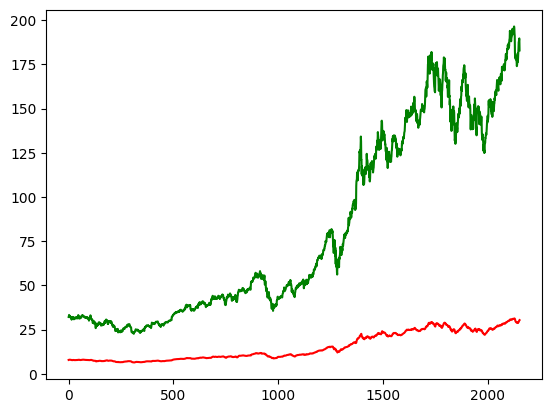

In [35]:
plt.plot(pred.squeeze() , color = "red" , label = "predicted")
plt.plot(real.squeeze() , color = "green" , label = "real")
plt.show()